<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Quiz3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We will import the libraries
#Numerical Python
import numpy as np       

#Python Dataframe
import pandas as pd   

#for Plotting
import seaborn as sns       

import matplotlib.pyplot as plt    

#regression function resides here
import statsmodels.api as sm        

In [ ]:
# Read the data set
vehicle = pd.read_csv("Quiz3_DataSet.csv")
vehicle.head()

,mileage,groove
0,0,394.33
1,4,329.50
2,8,291.00
3,12,255.17
4,16,229.33


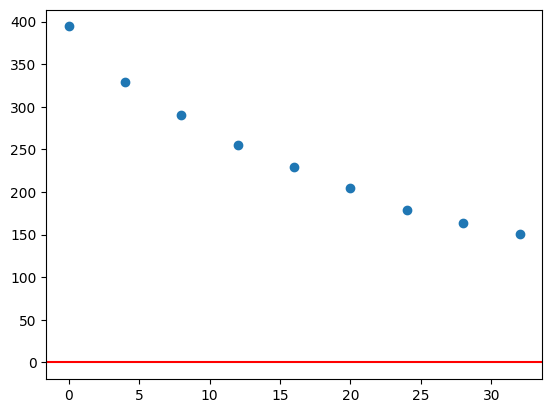

In [ ]:
#Scatter plot to check for linearity between milage and groove

plt.scatter(vehicle['mileage'], vehicle['groove'])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [ ]:
# Assigning mileage to x and groove to y
X = vehicle['mileage']
Y = vehicle['groove']

In [ ]:
# We will pefrom the regression here
X = sm.add_constant(X)

# For the Best Fit Line, use the class of stats model
model = sm.OLS(Y,X)    

 # fitting the data into  the model
results = model.fit()  

# Helps to give the final parameters
results.params         


const      360.636667
mileage     -7.280625
dtype: float64

In [ ]:
# Prediction based on model
mileage_prediction = results.predict(X)
print(mileage_prediction)

0    360.636667
1    331.514167
2    302.391667
3    273.269167
4    244.146667
5    215.024167
6    185.901667
7    156.779167
8    127.656667
dtype: float64


In [ ]:
# Computation of Error on the both side of the best fit line
vehicle['pred'] = mileage_prediction

vehicle['error'] = Y - mileage_prediction
vehicle.head()

,mileage,groove,pred,error
0,0,394.33,360.636667,33.693333
1,4,329.50,331.514167,-2.014167
2,8,291.00,302.391667,-11.391667
3,12,255.17,273.269167,-18.099167
4,16,229.33,244.146667,-14.816667


In [ ]:
#Computation of Mean Square Error by importing the mean_squared_error function from sklearn
import sklearn.metrics
sklearn.metrics.mean_squared_error(Y, vehicle['pred'])

281.2810472222222

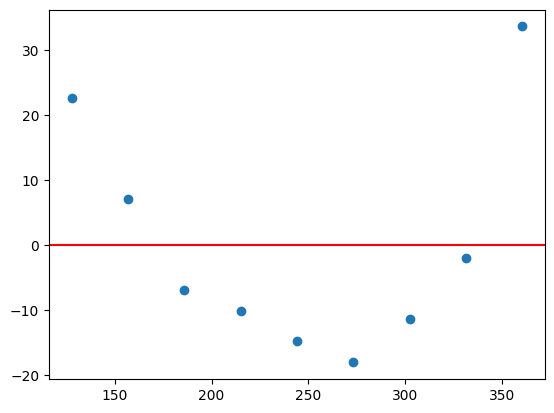

In [ ]:
#Plotting the points based on prediction vs errors

plt.scatter(vehicle['pred'], vehicle['error'])

plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [ ]:
#Check the Null Hypothesis 
# importing shapiro to get the p-value
from scipy.stats import shapiro

shapiro(np.abs(vehicle['error']))

# when p-value < 0.05 reject the null hypothesis. As 

ShapiroResult(statistic=0.9361082911491394, pvalue=0.5415816903114319)

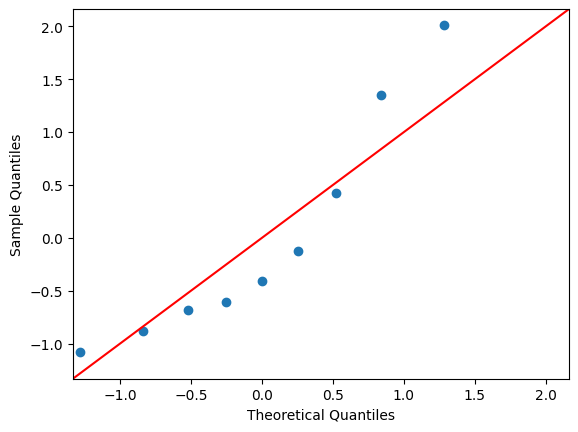

In [ ]:
#Plot of the Quantile Quantile Curve


fig = sm.qqplot(vehicle['error'], fit=True, line = '45')
plt.show()

1) From the above data_set we can conclude that there exists the negative correlation b/w mileage and groove depth of the tyre i.e as the mileage increases, the groove depth decreases, which suggests that the tire is wearing out over time. 
3) We see that p-value is > than 0.05, so we fail to reject the null hypothesis.
4) The scatter-plot's points of the QQ curve is along the straight line. This means that the error is normally distributed.
5) The R-squared value for this regression is high. The regression line is good fit for the data and the mileage is very well dependent on the groove depth.
6) All values are estimated. This vertical distance is known as a residual according to residual plot.
